In [49]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import plotly as pt
import json
plt.style.use('ggplot')
import seaborn as sns

In [12]:
data = pd.read_csv('SBUX_DATA_SATURDAY.csv')

In [4]:
pd.set_option('display.max_columns', 500)

In [9]:
data.head()

,Company Owned,Licensed,County,Store Number,CensusId,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,stateabbr,incounty,Pop/Location,percentemployed,binary
0,1.0,1.0,Abbeville,2.0,45001,South Carolina,24997,12308,12689,1.2,68.9,27.9,0.1,0.0,0.0,19399,34799.0,2097.0,18112,771,22.5,33.4,25.4,18.6,19.6,11.1,25.3,83.3,10.9,0.2,1.6,1.0,3.0,27.8,9294,80.2,13.5,6.2,0.0,10.7,SC,True,12498.500000,0.371805,1
1,17.0,18.0,Ada,35.0,16001,Idaho,417501,208879,208622,7.6,85.5,1.1,0.5,2.6,0.2,298836,56356.0,1082.0,28851,622,12.3,13.7,42.4,16.8,25.4,7.2,8.2,79.9,8.0,0.5,2.0,2.8,6.9,20.0,199955,77.2,15.8,6.9,0.1,6.6,ID,True,11928.600000,0.478933,1
2,0.0,1.0,Adair,1.0,29001,Missouri,25560,12147,13413,2.4,91.5,2.1,0.3,2.2,0.3,20427,37516.0,3100.0,19671,950,26.9,20.0,34.9,20.1,23.8,8.0,13.2,77.3,9.4,0.2,6.8,2.6,3.7,17.4,11096,71.8,22.3,5.9,0.0,7.9,MO,True,25560.000000,0.434116,1
3,32.0,27.0,Adams,68.0,8001,Colorado,471206,237107,234099,38.6,52.1,3.0,0.5,3.7,0.1,295079,58946.0,1016.0,25039,288,13.8,19.1,29.5,18.7,24.5,13.4,13.9,77.6,12.0,3.7,1.2,1.2,4.4,28.8,229743,83.6,11.3,5.0,0.1,7.9,CO,True,6929.500000,0.487564,1
4,1.0,1.0,Adams,68.0,17001,Illinois,67081,32676,34405,1.4,92.4,3.8,0.1,0.8,0.1,51386,45965.0,1350.0,24380,647,14.4,20.1,29.6,18.3,26.7,7.9,17.5,83.2,8.8,0.6,2.6,1.5,3.2,16.2,32400,83.4,10.7,5.6,0.2,6.8,IL,True,986.485294,0.482998,1


In [13]:
dataset = data[['County', 'State', 'Income', 'TotalPop', 'percentemployed', 'binary']]

In [14]:
dataset.head()

,County,State,Income,TotalPop,percentemployed,binary
0,Abbeville,South Carolina,34799.0,24997,0.371805,1
1,Ada,Idaho,56356.0,417501,0.478933,1
2,Adair,Missouri,37516.0,25560,0.434116,1
3,Adams,Colorado,58946.0,471206,0.487564,1
4,Adams,Illinois,45965.0,67081,0.482998,1


In [66]:
yes = dataset.iloc[:500]

In [67]:
no = dataset.iloc[-500:]

In [68]:
dataset = pd.concat([yes, no], axis = 0)

In [127]:
X = dataset.iloc[:, [2, 4]].values
y = dataset.iloc[:,5].values

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

In [150]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [151]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred = classifier.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [154]:
cm

array([[162,  91],
       [ 91, 156]])

In [155]:
np.sum(cm)

500

In [157]:
#Accuracy
(cm[0][0] + cm[1][1])/500

0.636

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


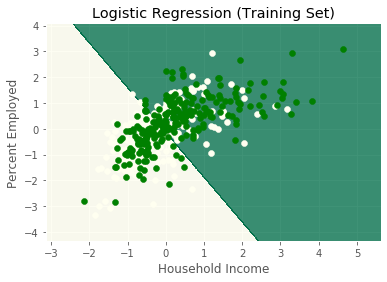

In [160]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                       alpha = .75, cmap = ListedColormap(('ivory', '#00704A')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('ivory', 'green'))(i), label = j)

plt.title('Logistic Regression (Training Set)')
plt.xlabel('Household Income')
plt.ylabel('Percent Employed')
plt.show()
    




'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


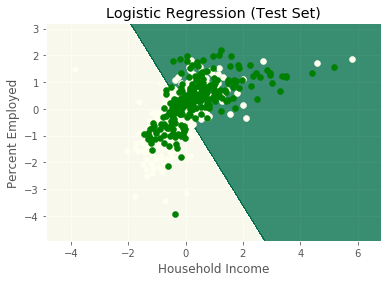

In [161]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, stop = X_set[:, 0].max() + 1, step = .01),
                     np.arange(start = X_set[:, 1].min() -1, stop = X_set[:, 1].max() + 1, step = .01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
                                       alpha = .75, cmap = ListedColormap(('ivory', '#00704A')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
               c = ListedColormap(('ivory', 'green'))(i), label = j)

plt.title('Logistic Regression (Test Set)')
plt.xlabel('Household Income')
plt.ylabel('Percent Employed')
plt.show()